# Imports

In [1]:
import numpy        as np
import pandas       as pd
import seaborn      as sns
import scikitplot   as skplt

# Libs para importar os dados do Banco de Dados
#import psycopg2 as pg
#import pandas.io.sql as psql

# Lib para não mostrar warnings de melhorias futuras (sugestão de novos comandos) das bibliotecas\n",
import warnings
warnings.filterwarnings('ignore')

from boruta     import BorutaPy
from matplotlib import pyplot   as plt

#from matplotlib import patches  as mpatches

from sklearn    import preprocessing    as pp
from sklearn    import model_selection  as ms
from sklearn    import ensemble         as en
from sklearn    import neighbors        as nh
from sklearn    import linear_model     as lm

#from sklearn.ensemble       import RandomForestRegressor
#from sklearn.ensemble       import RandomForestClassifier


In [2]:
def jupyter_settings():

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [10, 8]
    plt.rcParams['font.size'] = 24
    plt.rcParams['figure.constrained_layout.use'] = True

    sns.set()

# 1.0 Load Data

## 1.1 Connect DB

In [3]:
# Credentials
#host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com'
#port = 5432
#database = 'comunidadedsdb'
#username = 'member'
#pwd = 'cdspa'




In [4]:
# Conexão com o DB

#def connect_db(host, port, db, user, passw):
#    conn = pg.connect(host = host,
#                      port = port,
#                      database = db,
#                      user = user,
#                      password = passw)
#    return conn

In [5]:
# Conexão com o DB
#conn = pg.connect(host = host,
#                  port = port,
#                  database = database,
#                  user = username,
#                  password = pwd)

## 1.2 Schema Query

In [6]:
# Criação do cursor que irá apontar para o DB

#connect_db('comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com', 5432, 'comunidadedsdb', 'member', 'cdspa' )

#cursor = conn.cursor()

## Query para identificação dos schemas dentro do DB
#query_schema = """
#    SELECT nspname
#    FROM pg_catalog.pg_namespace

#"""
#cursor.execute(query_schema)

## Método para trazer dados
#record = cursor.fetchall()

# Importante fechar o cursor e a conexão
#cursor.close()
#conn.close()

# Show results
#record


## 1.3 Table Query

In [7]:
## Criação do cursor que irá apontar para o DB
#cursor = conn.cursor()

## Query para identificação das tabelas dentro do schema
#query_tables = """
#    SELECT tablename
#    FROM pg_tables
#    WHERE schemaname='pa004'
#
#"""
#cursor.execute(query_tables)

## Método para trazer dados
#record = cursor.fetchall()

# Importante fechar o cursor e a conexão
#cursor.close()
#conn.close()

## Show results
#record

## 1.4 Collect Data using Psycopg2

In [8]:
## Criação do cursor que irá apontar para o DB
#cursor = conn.cursor()

## Query para buscar dados na tabela
#query_table_users = """
#    SELECT *
#    FROM pa004.users u
#    WHERE u.age > 44

#"""
#cursor.execute(query_table_users)

## Método para trazer dados
#record = cursor.fetchall()

# Importante fechar o cursor e a conexão
#cursor.close()
#conn.close()

## Show results
#record

In [9]:
#data = pd.DataFrame(record)
#data.head()

## 1.5 Collect data using Pandas

In [10]:
#query_users_columns = """ SELECT * FROM pa004.users """
#query_vehicle_columns = """ SELECT * FROM pa004.vehicle """
#query_insurance_columns = """ SELECT * FROM pa004.insurance """


In [11]:
#users_col = psql.read_sql(query_users_columns, conn)
#print(users_col)
#vehicle_col = psql.read_sql(query_vehicle_columns, conn)
#print(vehicle_col)
#insurance_col = psql.read_sql(query_insurance_columns, conn)
#print(insurance_col)

In [12]:
## Query para Juntar todas as tabelas e mostrar uma tabela só
#query_table_users = """
#    SELECT *
#    FROM pa004.users u INNER JOIN pa004.vehicle   v on (u.id = v.id)
#                       INNER JOIN pa004.insurance i on (u.id = i.id)
#"""

#df = psql.read_sql(query_table_users, conn)
#df


In [13]:
# Exclusão dos ID's duplicados no JOIN
#df1 = pd.read_sql(query_table_users, conn)
#df1 = df1.iloc[:, [0,1,2,3,4,6,7,8,10,11,12,13]]
#df1


In [14]:
# Saving data to local csv file
# Utilizar somente quando for buscar os dados no banco e salvar novamente.
#df1.to_csv('data/pa004_health_insurance_raw.csv', index=False)

In [15]:
# Reading csv file
df_raw = pd.read_csv('data/pa004_health_insurance_raw.csv')
df_raw

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.0,152.0,1,< 1 Year,Yes,0,23367.0,249,0
1,13,Female,41,15.0,14.0,1,1-2 Year,No,1,31409.0,221,0
2,18,Female,25,35.0,152.0,1,< 1 Year,No,1,46622.0,299,0
3,31,Female,26,8.0,160.0,1,< 1 Year,No,0,2630.0,136,0
4,39,Male,45,8.0,124.0,1,1-2 Year,Yes,0,42297.0,264,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381070,Male,24,8.0,152.0,1,< 1 Year,No,1,38254.0,127,0
381105,381079,Female,58,28.0,26.0,1,1-2 Year,Yes,0,39740.0,170,0
381106,381082,Female,75,28.0,26.0,1,1-2 Year,No,1,51619.0,80,0
381107,381097,Female,49,10.0,26.0,1,1-2 Year,Yes,0,34541.0,44,0


# 2.0 Data Description

In [16]:
df2 = df_raw.copy()


In [17]:
print(f'Number of rows: {df2.shape[0]}')
print(f'Number of columns: {df2.shape[1]}')

Number of rows: 381109
Number of columns: 12


In [18]:
df2.dtypes

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

In [19]:
df2.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

In [20]:
# Retirar caracteres e texto
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'below_1_years' if x == '< 1 Year' else 'over_2_years'
                                                                        if x == '> 2 Years' else 'between_1_2_year')

# Alterar str para numérico e o tipo da variável para inteiro
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)
df2['vehicle_damage'] = df2['vehicle_damage'].astype('int64')

# Alteração do tipo da variável para inteiro
df2['region_code'] = df2['region_code'].astype('int64')

# Alteração do tipo da variável para inteiro
df2['policy_sales_channel'] = df2['policy_sales_channel'].astype('int64')

# Altera Male == 1 e Female == 2, e coloca variável como inteira
df2['gender'] = df2['gender'].apply(lambda x: 1 if x == 'Male' else 2)
df2['gender'] = df2['gender'].astype('int64')


In [21]:
df2.head(10)

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,1,23,11,152,1,below_1_years,1,0,23367.0,249,0
1,13,2,41,15,14,1,between_1_2_year,0,1,31409.0,221,0
2,18,2,25,35,152,1,below_1_years,0,1,46622.0,299,0
3,31,2,26,8,160,1,below_1_years,0,0,2630.0,136,0
4,39,1,45,8,124,1,between_1_2_year,1,0,42297.0,264,0
5,55,2,44,28,13,1,between_1_2_year,1,0,45415.0,73,0
6,73,2,23,39,152,1,below_1_years,0,1,40372.0,242,0
7,79,1,29,28,26,1,between_1_2_year,1,0,42567.0,167,1
8,95,2,23,15,152,1,below_1_years,1,0,41641.0,209,0
9,108,1,31,29,124,1,between_1_2_year,1,0,28867.0,247,0


In [22]:
df2.dtypes

id                        int64
gender                    int64
age                       int64
region_code               int64
policy_sales_channel      int64
driving_license           int64
vehicle_age              object
vehicle_damage            int64
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

In [23]:
num_atrib = df2.select_dtypes(include = ['int64', 'float64'])
cat_atrib = df2.select_dtypes(exclude = ['int64', 'float64'])


In [24]:
# Central Tendency
ct1 = pd.DataFrame(round(num_atrib.apply(np.mean), 2)).T
ct2 = pd.DataFrame(num_atrib.apply(np.median)).T

# Dispersion (std, min, max, range, skew, kurtosis)
d1 = pd.DataFrame(round(num_atrib.apply(np.std), 2)).T
d2 = pd.DataFrame(round(num_atrib.apply(np.min), 2)).T
d3 = pd.DataFrame(round(num_atrib.apply(np.max), 2)).T
d4 = pd.DataFrame(round(num_atrib.apply(lambda x: x.max() - x.min()), 2)).T
d5 = pd.DataFrame(round(num_atrib.apply(lambda x: x.skew()), 2)).T
d6 = pd.DataFrame(round(num_atrib.apply(lambda x: x.kurtosis()), 2)).T

df21 = pd.concat([d2, ct1, d3, ct2, d1, d4, d5, d6]).T
df21.columns=['Min', 'Media','Max','Mediana','STD','Range','Skew','Kurtosis']
df21

,Min,Media,Max,Mediana,STD,Range,Skew,Kurtosis
id,1.0,190555.00,381109.0,190555.0,110016.69,381108.0,-0.00,-1.20
gender,1.0,1.46,2.0,1.0,0.50,1.0,0.16,-1.97
age,20.0,38.82,85.0,36.0,15.51,65.0,0.67,-0.57
region_code,0.0,26.39,52.0,28.0,13.23,52.0,-0.12,-0.87
policy_sales_channel,1.0,112.03,163.0,133.0,54.20,162.0,-0.90,-0.97
driving_license,0.0,1.00,1.0,1.0,0.05,1.0,-21.60,464.35
vehicle_damage,0.0,0.50,1.0,1.0,0.50,1.0,-0.02,-2.00
previously_insured,0.0,0.46,1.0,0.0,0.50,1.0,0.17,-1.97
annual_premium,2630.0,30564.39,540165.0,31669.0,17213.13,537535.0,1.77,34.00
vintage,10.0,154.35,299.0,154.0,83.67,289.0,0.00,-1.20


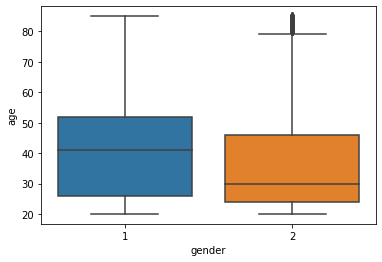

In [25]:
ax = sns.boxplot(x='gender', y='age', data=df2)


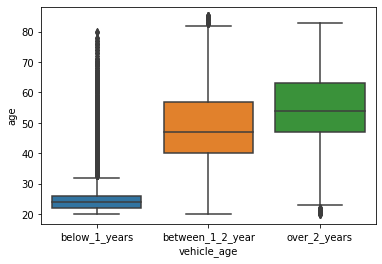

In [26]:
ax = sns.boxplot(x='vehicle_age', y='age', data=df2)

# 3.0 Feature Engineering

In [27]:
df3 = df2.copy()

In [28]:
# Criação de faixas etárias
#df3['age_group'] = df3['age'].apply(lambda x: 'below20' if x < 20 else
#                                              '20a29' if 20 <= x <= 29 else
#                                              '30a49' if 30 <= x <= 49 else
#                                              '50a69' if 50 <= x <= 69 else
#                                              'above70')

In [29]:
df3.sample(5)

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
158848,125468,2,33,39,156,1,between_1_2_year,1,0,2630.0,215,0
277064,309165,1,56,46,94,1,between_1_2_year,1,0,28624.0,170,0
117317,174505,2,24,28,26,1,below_1_years,0,1,24712.0,237,0
72238,195416,1,31,3,152,1,below_1_years,0,1,2630.0,274,0
336564,23184,2,39,28,124,1,between_1_2_year,0,1,2630.0,120,0


# 4.0 Data Filtering

In [30]:
df4 = df3.copy()

In [31]:
#df4 = df4.drop('policy_sales_channel', axis=1)
#df4.columns

In [32]:
df4.sample(5)

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
27055,216236,1,30,11,157,1,between_1_2_year,1,0,2630.0,258,1
94495,373194,2,70,50,8,1,between_1_2_year,0,1,41229.0,171,0
197731,54769,2,28,50,152,1,below_1_years,0,1,19841.0,87,0
303478,138589,2,21,37,152,1,below_1_years,0,1,34979.0,24,0
41637,332336,1,37,28,124,1,between_1_2_year,1,0,46597.0,146,0


# 5.0 EDA

In [33]:
df5 = df4.copy()
jupyter_settings()

## 5.1 Análise Univariada

<AxesSubplot:xlabel='response', ylabel='age'>

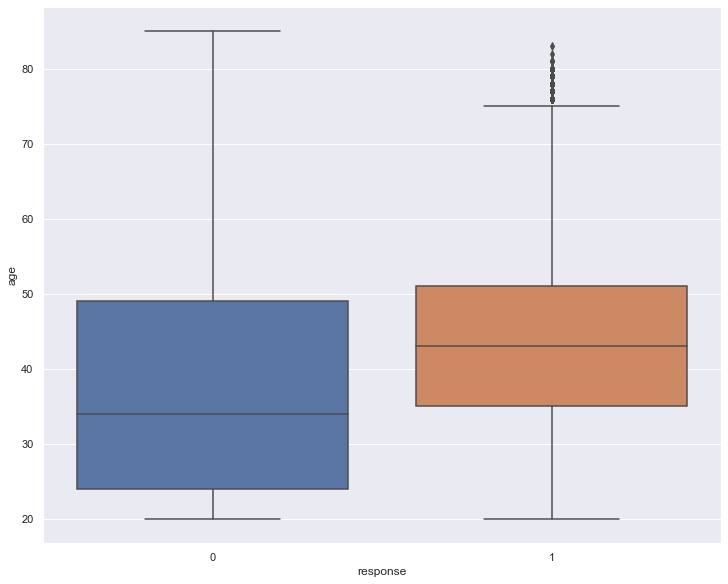

In [34]:
# age
sns.boxplot(x='response', y='age', data=df5)

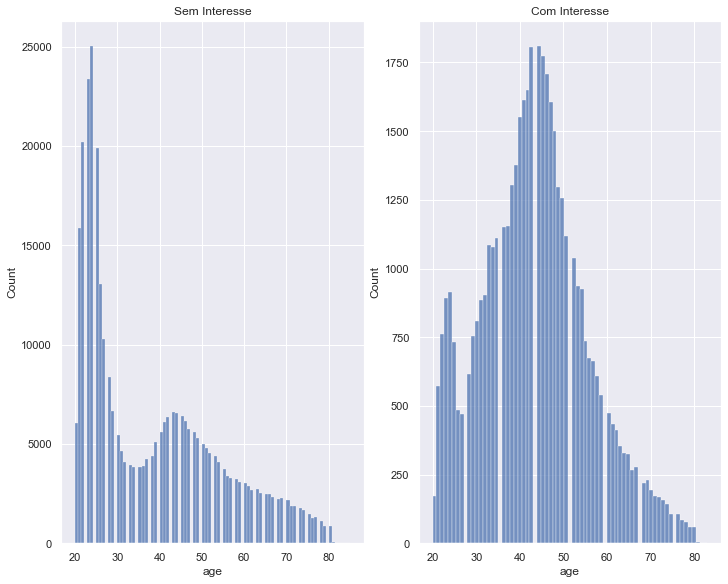

In [35]:
plt.subplot(1,2,1)
aux00 = df5.loc[df5['response'] == 0, 'age' ]
ax = sns.histplot(aux00).set(title = 'Sem Interesse')

plt.subplot(1,2,2)
aux01 = df5.loc[df5['response'] == 1, 'age' ]
sns.histplot(aux01).set(title = 'Com Interesse');

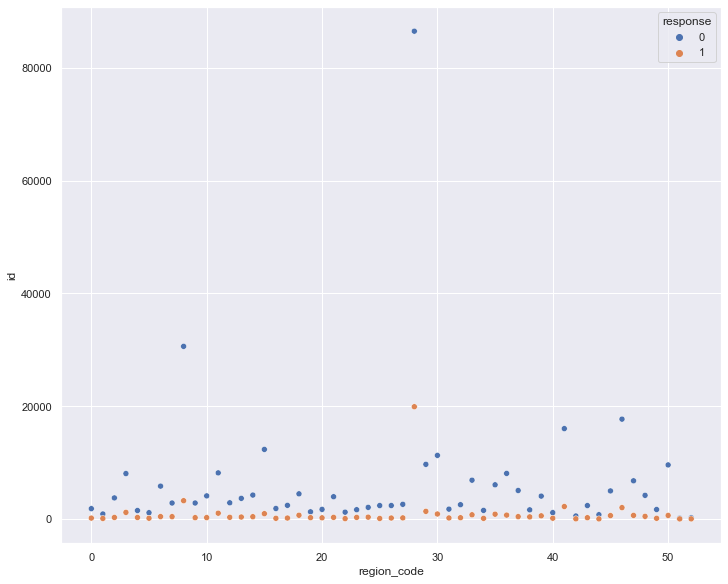

In [36]:
# region_code

aux = df5[['id', 'region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()
sns.scatterplot(x='region_code', y='id', hue='response', data=aux );

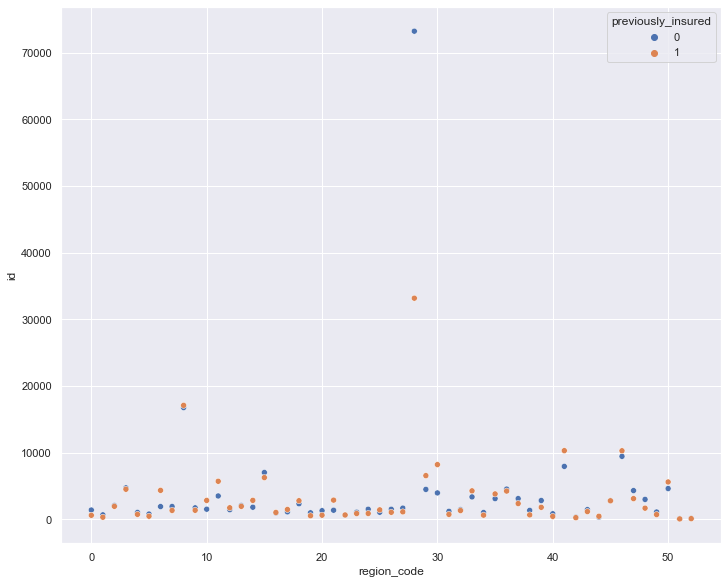

In [37]:
# region_code

aux = df5[['id', 'region_code', 'previously_insured']].groupby(['region_code', 'previously_insured']).count().reset_index()
sns.scatterplot(x='region_code', y='id', hue='previously_insured', data=aux );

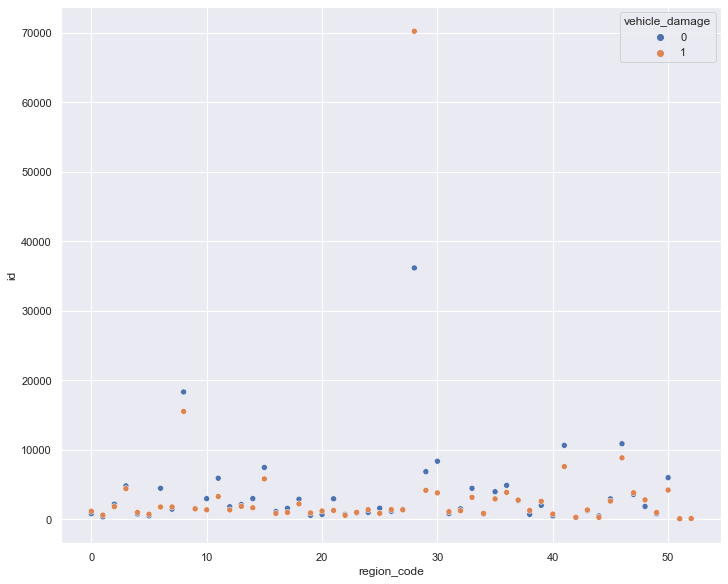

In [38]:
# region_code

aux = df5[['id', 'region_code', 'vehicle_damage']].groupby(['region_code', 'vehicle_damage']).count().reset_index()
sns.scatterplot(x='region_code', y='id', hue='vehicle_damage', data=aux );

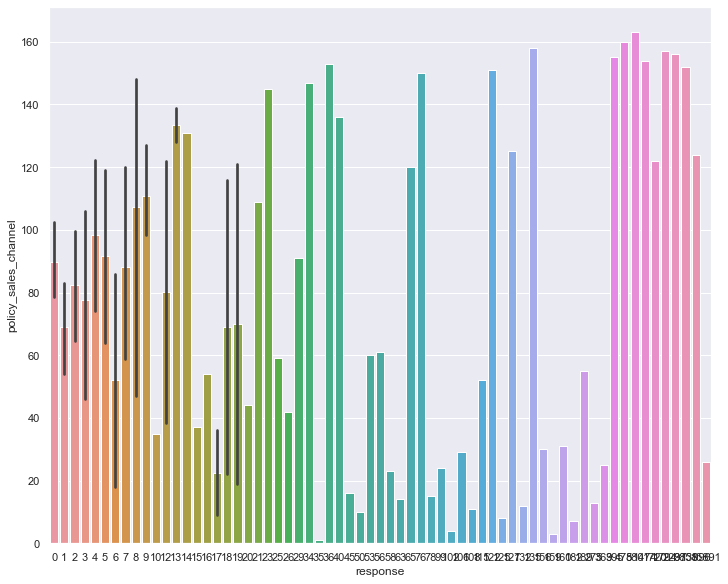

In [39]:
# policy_sales_channel

aux = df5[['policy_sales_channel', 'response']].groupby('policy_sales_channel').sum().reset_index()
sns.barplot(x='response', y='policy_sales_channel', data=aux);

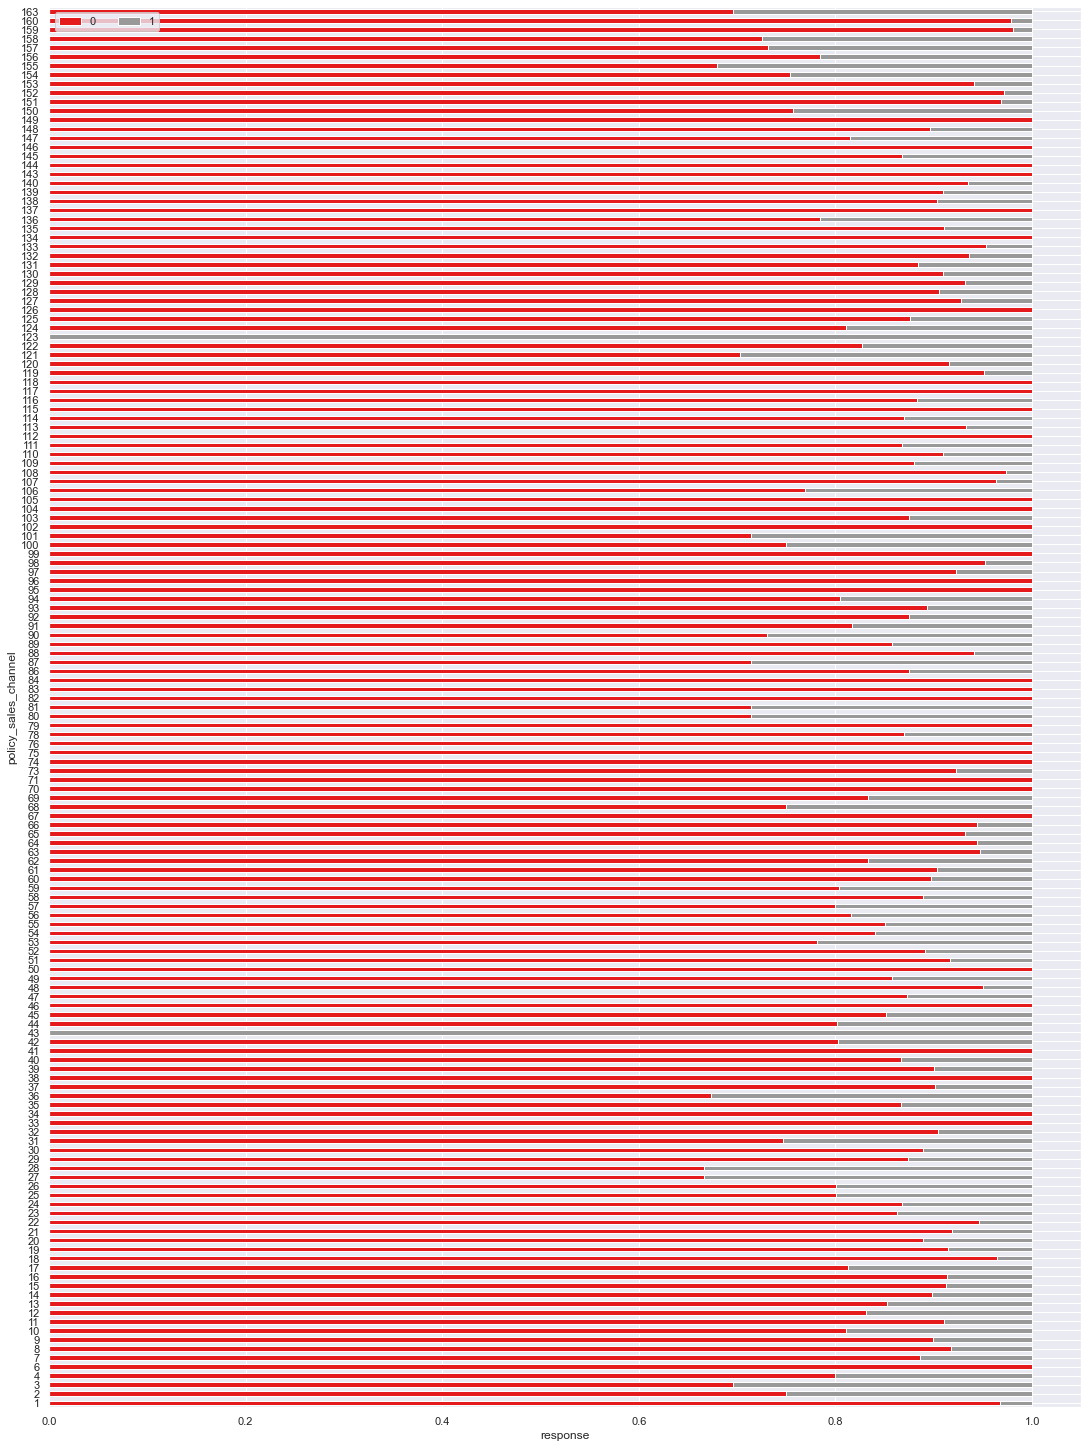

In [40]:
# policy_sales_channel - Stacked
#https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b

aux = df5[['policy_sales_channel', 'response']]

cross_tab_prop = pd.crosstab(index=aux['policy_sales_channel'],
                             columns=aux['response'],
                             normalize="index")

cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='Set1', 
                    figsize=(15, 20))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("response")
plt.ylabel("policy_sales_channel")
plt.show()



In [41]:
# driving_license

aux = df5[['driving_license', 'response']].groupby('response').sum().reset_index()
aux['driving_license_perc'] = round((aux['driving_license'] / aux['driving_license'].sum()) * 100, 2)
aux

,response,driving_license,driving_license_perc
0,0,333628,87.73
1,1,46669,12.27


In [42]:
# vehicle_age

df5[['vehicle_age', 'response']].value_counts(normalize=True, sort=False) .reset_index()

,vehicle_age,response,0
0,below_1_years,0,0.413488
1,below_1_years,1,0.018897
2,between_1_2_year,0,0.434285
3,between_1_2_year,1,0.091328
4,over_2_years,0,0.029663
5,over_2_years,1,0.012338


In [43]:
# vehicle_damage

In [44]:
# previously_insured

pd.crosstab(df5['previously_insured'], df5['response']).apply(lambda x: x / x.sum(), axis=1)

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


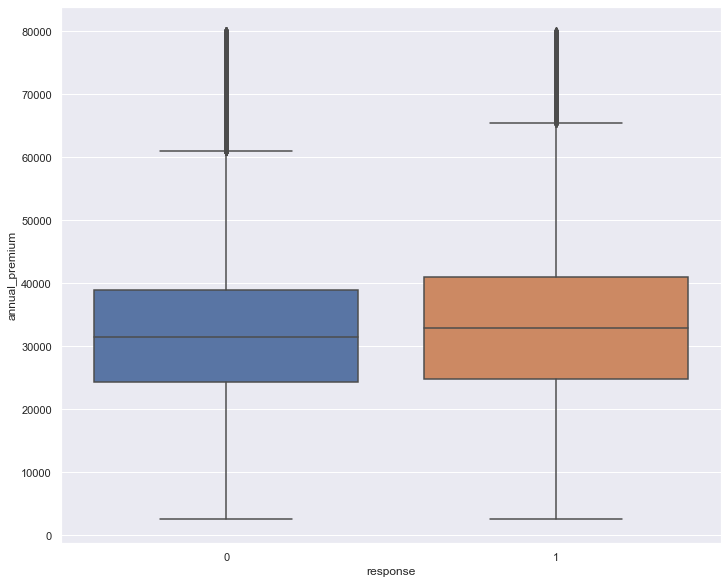

In [45]:
# annual_premium
aux = df5[df5['annual_premium'] < 80000]
sns.boxplot(x='response', y='annual_premium', data=aux);

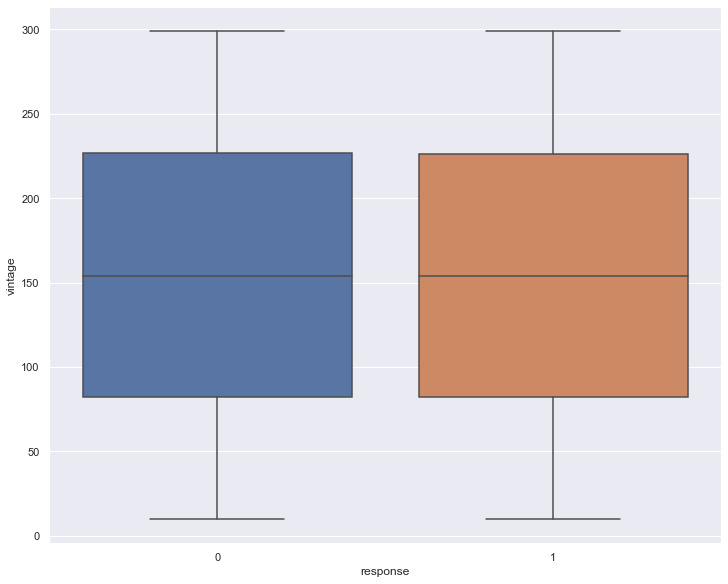

In [46]:
# vintage

sns.boxplot(x='response', y='vintage', data=df5);

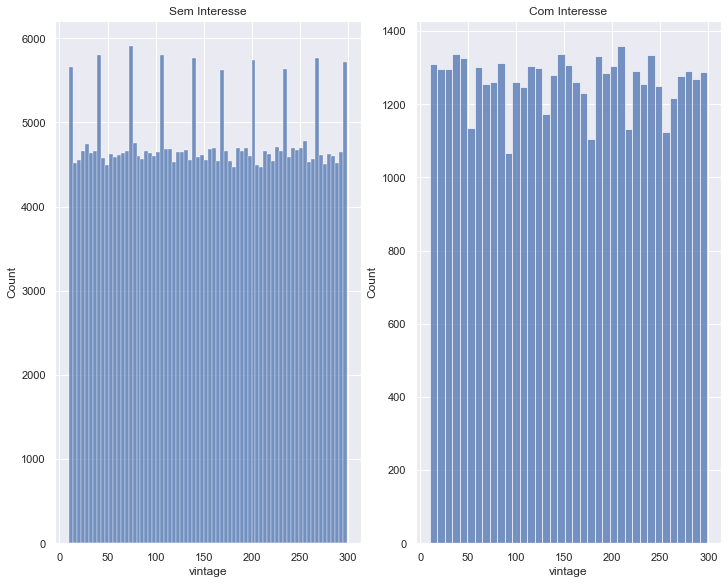

In [47]:
plt.subplot(1,2,1)
aux00 = df5.loc[df5['response'] == 0, 'vintage' ]
ax = sns.histplot(aux00).set(title = 'Sem Interesse')

plt.subplot(1,2,2)
aux01 = df5.loc[df5['response'] == 1, 'vintage' ]
sns.histplot(aux01).set(title = 'Com Interesse');

### 5.1.1 Hipóteses

1. Clientes de uma mesma **região** sofrem mais acidentes.
2. Clientes sem **licença** para dirigir sofrem mais acidentes
3. Clientes que **já sofreram** acidentes pagam, em média, prêmio maior
4. Clientes na faixa **etária** de 20 a 30 anos pagam prêmio maior
5. Clientes na faixa **etária** acima de 70 anos sofrem mais acidentes
6. Clientes do **gênero** feminino pagam prêmio maior
7. Clientes mais **antigos (associação)** tendem a fechar um novo produto/seguro
8. Clientes do **gênero** feminino tendem a fechar um novo produto (**response**) mais do que os homens. 
9. Veículos mais **antigos** sofrem mais acidentes
10. Veículos mais **antigos** pagam prêmio maior

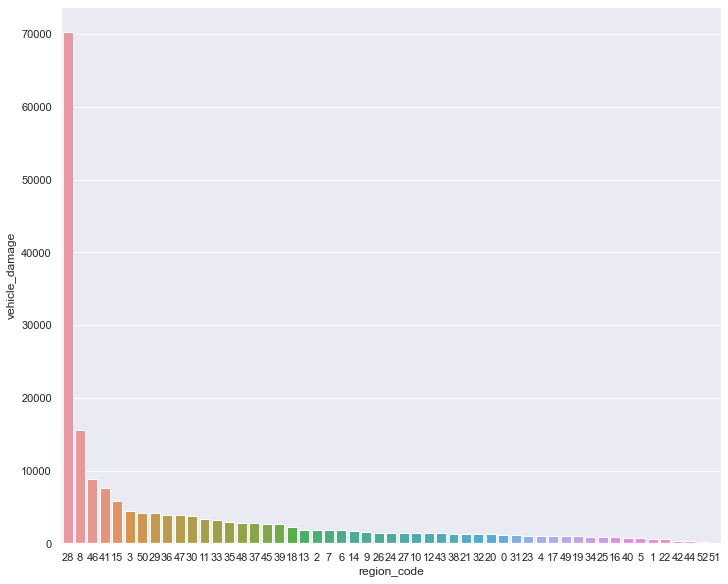

In [48]:
# 1. Clientes de uma mesma região sofrem mais acidentes.

ax = df5[['region_code', 'vehicle_damage']].groupby('region_code').sum().reset_index()


sns.barplot(x='region_code',
            y='vehicle_damage',
            data=ax,
            order=ax.sort_values('vehicle_damage', ascending=False).region_code
           );



In [49]:
# 2.Clientes sem licença para dirigir sofrem mais acidentes

df5[['driving_license', 'vehicle_damage']].groupby('driving_license').sum().reset_index()


,driving_license,vehicle_damage
0,0,556
1,1,191857


In [50]:
# 3. Clientes que já sofreram acidentes pagam, em média, prêmio maior

ax = df5[['vehicle_damage', 'annual_premium']].groupby('vehicle_damage').mean().reset_index()
ax


,vehicle_damage,annual_premium
0,0,30401.881693
1,1,30723.758171


In [51]:
# 4. Clientes na faixa etária de 20 a 30 anos pagam prêmio maior
# 5. Clientes na faixa etária acima de 70 anos sofrem mais acidentes

##### FAZER NA SEGUNDA RODADA CRISP #####


In [52]:
# 6.Clientes do gênero feminino pagam prêmio maior

ax = df5[['gender', 'annual_premium']].groupby('gender').mean().reset_index()
ax


,gender,annual_premium
0,1,30622.649122
1,2,30495.787990


In [53]:
# 7. Clientes mais antigos (associação) tendem a fechar um novo produto/seguro

ax = df5[['response', 'vintage']].groupby('response').mean().reset_index()
ax


,response,vintage
0,0,154.380243
1,1,154.112246


In [54]:
# 8. Clientes do gênero feminino tendem a fechar um novo produto (response) mais do que os homens. 

#ax = df5[['id', 'response', 'gender']].groupby(['response', 'gender']).count().reset_index()
pd.crosstab(df5['gender'], df5['response']).apply(lambda x: round((x / x.sum())*100, 2), axis=1)


response,0,1
gender,,
1,86.16,13.84
2,89.61,10.39


In [55]:
# 9.Veículos mais antigos sofrem mais acidentes

aux = df5[df5['vehicle_damage'] == 1]
aux[['id', 'vehicle_age']].groupby('vehicle_age').count()

# Fazer o percentual de acordo com cada tipo idade e o total dentro da idade



,id
vehicle_age,
below_1_years,48196
between_1_2_year,128225
over_2_years,15992


In [56]:
df5[['id', 'vehicle_age']].groupby('vehicle_age').count().reset_index()

,vehicle_age,id
0,below_1_years,164786
1,between_1_2_year,200316
2,over_2_years,16007


In [57]:
# 10. Veículos mais antigos pagam prêmio maior

df5[['vehicle_age', 'annual_premium']].groupby('vehicle_age').mean().reset_index()



,vehicle_age,annual_premium
0,below_1_years,30119.552025
1,between_1_2_year,30523.582120
2,over_2_years,35654.499469


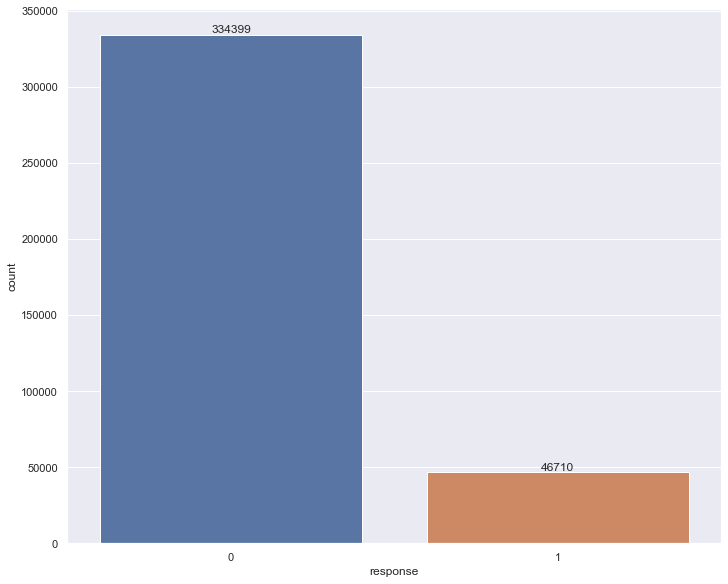

In [58]:
ax = sns.countplot(df5['response'])
ax.bar_label(ax.containers[0]);

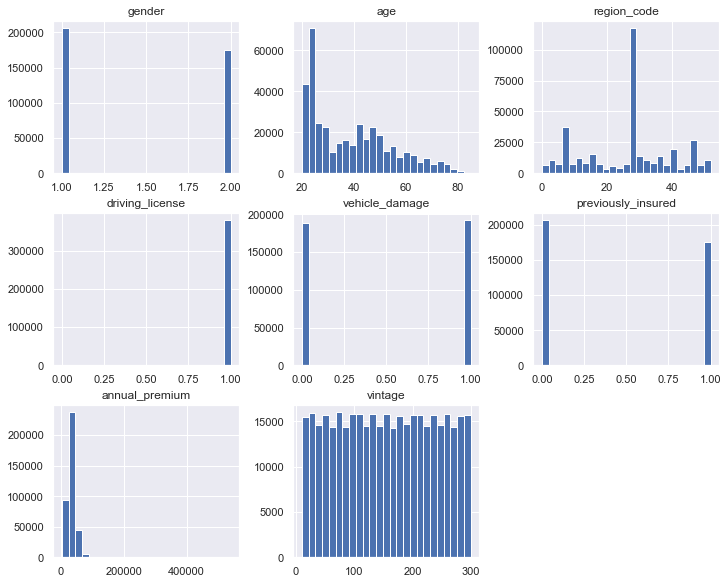

In [59]:
cols_drop = ['id', 'policy_sales_channel', 'response']
num_atrib = num_atrib.drop(cols_drop, axis=1)
num_atrib.hist(bins=25);

## 5.2 Análise Bivariada

# 6.0 Data Preparation

In [60]:
df6 = df5.copy()

In [61]:
X = df6.drop('response', axis=1)
y = df6['response'].copy()

X_train, x_validation, y_train, y_validation = ms.train_test_split(X, y, test_size=0.20)

df6 = pd.concat([X_train, y_train], axis=1)


## 6.1 Standardization

In [62]:
ss = pp.StandardScaler()

# annual_premium
df6['annual_premium'] = ss.fit_transform(df6[['annual_premium']].values)


## 6.2 Rescaling

In [63]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

#age
df6['age'] = mms_age.fit_transform(df6[['age']].values)

# vintage
df6['vintage'] = mms_vintage.fit_transform(df6[['vintage']].values)


## 6.3 Encoder

In [64]:
# gender - Escolher um encoder: One Hot Encoding / Target Encoding
target_encode_gender = df6.groupby('gender')['response'].mean()
df6.loc[:, 'gender'] = df6['gender'].map(target_encode_gender)

# region_code - Escolher um encoder: Frequency Encoding / Target Encoding
target_encode_region_code = df6.groupby('region_code')['response'].mean()
df6.loc[:, 'region_code'] = df6['region_code'].map(target_encode_region_code)

# vehicle_age - Escolher um encoder: One Hot Encoding / Order Encoding / Frequency Encoding
df6 = pd.get_dummies(df6, prefix='vehicle_age', columns=['vehicle_age'])

# policy_sales_channel - Escolher um encoder: Frequency Encoding / Target Encoding
fe_policy_sales_channel = df6.groupby('policy_sales_channel').size() / len(df6)
df6.loc[:, 'policy_sales_channel'] = df6['policy_sales_channel'].map(fe_policy_sales_channel)


## 6.4 Validation Preparation

In [65]:
# gender
x_validation.loc[:, 'gender'] = x_validation.loc[:, 'gender'].map(target_encode_gender)

# age
x_validation.loc[:, 'age'] = mms_age.transform(x_validation[['age']].values)

# region_code
x_validation.loc[:, 'region_code'] = x_validation.loc[:, 'region_code'].map(target_encode_region_code)

# vehicle_age
x_validation = pd.get_dummies(x_validation, prefix='vehicle_age', columns=['vehicle_age'])

# annual_premium
x_validation.loc[:, 'annual_premium'] = ss.fit_transform(x_validation[['annual_premium']].values)

# policy_sales_channel
x_validation.loc[:, 'policy_sales_channel'] = x_validation['policy_sales_channel'].map(fe_policy_sales_channel)

# vintage
x_validation.loc[:, 'vintage'] = mms_vintage.transform(x_validation[['vintage']].values)

# fillna
x_validation = x_validation.fillna(0)


# 7.0 Feature Selection

In [66]:
df7 = df6.copy()

## 7.0.1 Features Importance

In [67]:
# model definition
forest = en.ExtraTreesClassifier(n_estimators=250, random_state=0, n_jobs=-1)

# Data Preparation
x_train_n = df7.drop(['id', 'response'], axis=1)
y_train_n = y_train.values
forest.fit(x_train_n, y_train_n)


ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature ranking:
                        feature  importance
0                       vintage    0.273044
0                annual_premium    0.244232
0                           age    0.165326
0                   region_code    0.105400
0                vehicle_damage    0.068417
0          policy_sales_channel    0.059299
0            previously_insured    0.055626
0     vehicle_age_below_1_years    0.014130
0  vehicle_age_between_1_2_year    0.006656
0                        gender    0.005069
0      vehicle_age_over_2_years    0.002289
0               driving_license    0.000513


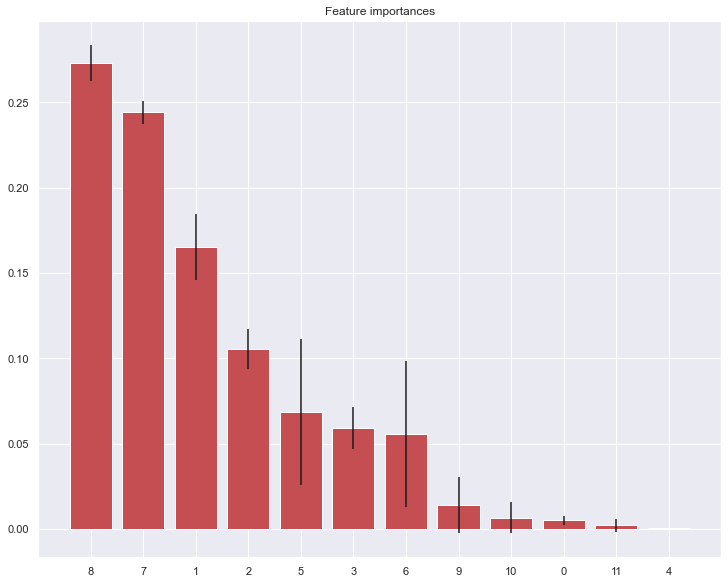

In [68]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
df = pd.DataFrame()
for i, j in zip(x_train_n, forest.feature_importances_):
    aux = pd.DataFrame({'feature': i, 'importance': j}, index = [0])
    df = pd.concat([df, aux], axis=0)
print(df.sort_values('importance', ascending=False))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train_n.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train_n.shape[1]), indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show();


# 8.0 Machine Learning 

In [69]:
df8 = df7.copy()

In [70]:
cols_selected = ['vintage', 'annual_premium', 'age', 'region_code', 'vehicle_damage', 'policy_sales_channel', 'previously_insured']

x_train = df8[cols_selected]
x_val = x_validation[cols_selected]
y_val = y_validation.copy()


## 8.1 KNN

In [71]:
# treino
# Model definition
knn_model = nh.KNeighborsClassifier(n_neighbors=3) # neighbors qt mais alto, mais o modelo melhora, ou seja, a linha de gain acumulado tende a 1.

# treino
# Model Training
knn_model.fit(x_train, y_train)

# validação
# Model Prediction - Poder de GENERALIZAÇÃO
yhat_knn = knn_model.predict_proba(x_val)


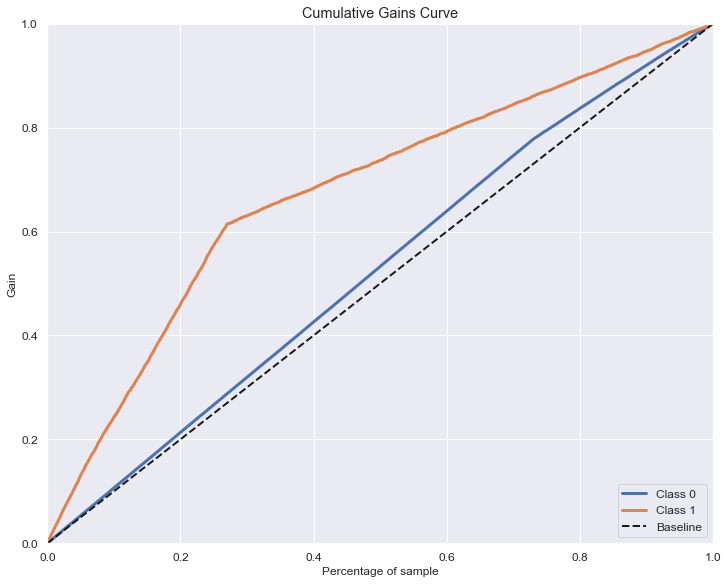

In [72]:
# Acumulative Gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_knn);


In [73]:

# Análise do Gráfico
# (n_neighbors=2)
# Se abordarmos 20% (eixo x) da nossa lista ordenada, teremos 50% de todas as pessoas interessadas

# (n_neighbors=7)
# Se abordarmos 40% (eixo x) da nossa lista ordenada, teremos mais de 80% de todas as pessoas interessadas

# (n_neighbors=3) -> Resposta para uma pergunta do stakeholder
# Se abordarmos por volta de 30% (eixo x) da nossa lista ordenada, teremos mais de 60% de todas as pessoas interessadas
# Ou seja, qual é o percentual ideal para impactarmos o máximo de pessoas interessadas possível, com o menor custo possível.

# O modelo utilizado visa a ordenação dos dados e não a classificação.
# Método de ordenação de lista: rank


## 8.2 Linear Model - Logistic Regression

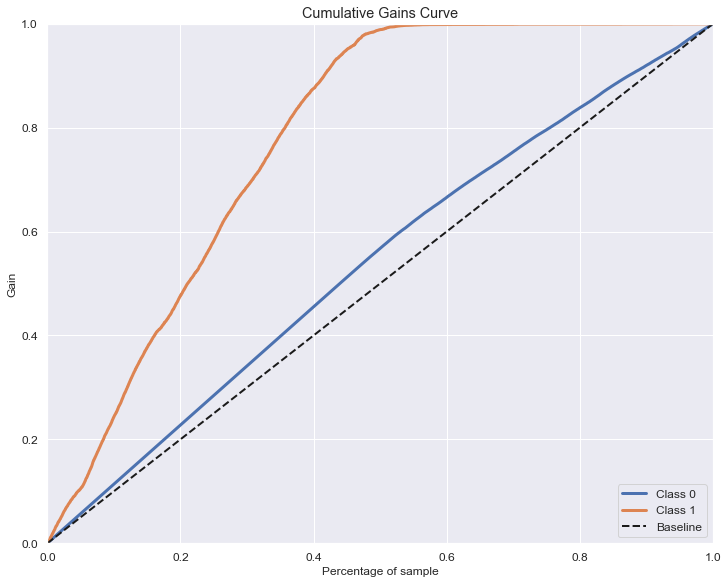

In [74]:
# treino
# Model definition
lr_model = lm.LogisticRegression(random_state=42)

# treino
# Model Training
lr_model.fit(x_train, y_train)

# validação
# Model Prediction - Poder de GENERALIZAÇÃO
yhat_lr = lr_model.predict_proba(x_val)

# Acumulative Gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_lr);

## 8.3 Comparação entre modelos

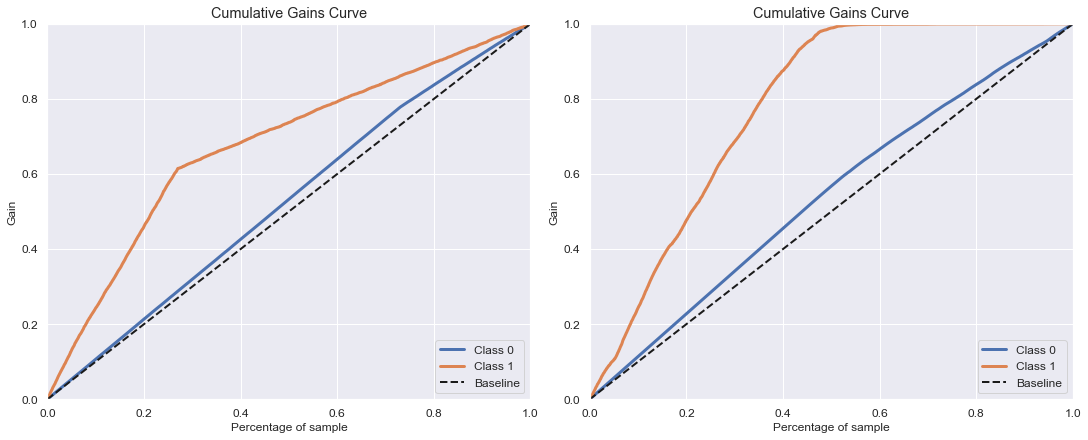

In [75]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_cumulative_gain(y_val, yhat_knn, ax=ax1);

ax2 = fig.add_subplot(122)
skplt.metrics.plot_cumulative_gain(y_val, yhat_lr, ax=ax2);

In [76]:

# Gráfico1 (modelo KNN): Se abordarmos mais ou menos 30% da lista ordenada, iremos atingir mais de 60% de pessoas interessadas.

# Gráfico2 (modelo Linear Regression): Se abordarmos mais ou menos 50% da lista ordenada, iremos atingir 100% de pessoas interessadas.


# O trabalho de DS é melhorar a ordenação da lista (próxima rodada CRISP), identificar/criar novas features, fazendo balanceamento,
# para que a curva fique mais íngreme possível.

# Não precisamos classificar a pessoa com f1-score alto e sim ordenar a lista de maiores interessados.




## 8.4 Extra Trees

In [77]:
# model definition
et = en.ExtraTreesClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

# model fit
et.fit(x_train, y_train)

# model predict
yhat_et = et.predict_proba(x_val)



# 9.0 Model Performance

In [78]:
def precision_at_k(data, k=2000):
    
    # sort clients by porpensity score
    data = data.sort_values('score', ascending=False)
    
    # reset index
    data = data.reset_index(drop=True)
    
    # create ranking order
    data['ranking'] = data.index + 1
    
    # calc precision
    data['precision_at_k'] = data['response'].cumsum() / data['ranking']
    
    return data.loc[k, 'precision_at_k']

In [79]:
def recall_at_k(data, k=2000): 
    
    # sort clients by porpensity score
    data = data.sort_values('score', ascending=False)
    
    # reset index
    data = data.reset_index(drop=True)
    
    # create ranking order
    data['ranking'] = data.index + 1
    
    # calc precision
    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()
    
    return data.loc[k, 'recall_at_k']

In [80]:
df9 = x_validation.copy()
df9['response'] = y_validation.copy()

# Propensity Score
df9['score'] = yhat_knn[:, 1].tolist()

# compute precision at K
precision_at_50 = precision_at_k(df9, k=20000)
print('Precision at K: {}'.format(precision_at_50))

# compute precision at K
recall_at_50 = recall_at_k(df9, k=20000)
print('Recall at K: {}'.format(recall_at_50))

Precision at K: 0.27643617819109045
Recall at K: 0.5965688390159689


In [81]:

# Fazer as atividades que estão no final do planejamento
# Próximos passos é treinar com randomforest, xgboost, extra trees
# criar novas features
# utilizar encoders
# fazer balanceamento dos dados
# testar PCA (aplicar o knn ou lr no espaço resultado do PCA)


